Zadanie 1.
Dla poniższych funkcji i punktów początkowych metoda Newtonazawodzi. Wyjaśnij dlaczego. Następnie znajdź pierwiastki, modyfikując wywo-łanie funkcji scipy.optimize.newton lub używając innej metody.

(a)f(x) =x3−5x,x0= 1

(b)f(x) =x3−3x+ 1,x0= 1

(c)f(x) = 2−x5,x0= 0.01

(d)f(x) =x4−4.29x2−5.29,x0= 0.8

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import newton, root

In [4]:
def derivative_central(f, x, h):
    df = (f(x + h) - f(x - h)) / (2*h)
    return df

In [5]:
def f_a(x):
    return x ** 3 - 5 * x

In [6]:
def f_b(x):
    return x ** 3 - 3 * x + 1

In [7]:
def f_c(x):
    return 2 - x ** 5

In [8]:
def f_d(x):
    return x ** 4 - 4.29 * x **2 - 5.29

In [9]:
functions_1 = [f_a, f_b, f_c, f_d]
xs = [1, 1, 0.01, 0.8]
solve_1 = []
solve_1_better = []
for func, x0 in zip(functions_1, xs):
    solve_1.append(newton(func, x0))
    solve_1_better.append(root(func, x0))

print(solve_1)
for i in range(len(functions_1)):
    print(solve_1_better[i].x)

[4.744493466790075e-24, 1.0000007188230098, 0.01, -0.7870232540616441]
[0.]
[1.0015534]
[1.14869835]
[0.00207867]


a)  Przeanalizuj zbieżność oraz rząd zbieżności schematów iteracyjnych odpo-wiadających funkcjomgi(x)dla pierwiastkax= 2badając wartość|g′i(2)|.

(b)  Potwierdź analizę teoretyczną implementując powyższe schematy iteracyjnei weryfikując ich zbieżność (lub brak). Każdy schemat iteracyjny wykonajprzez 10 iteracji.Wyznacz eksprymentalnie rząd zbieżności każdej metody iteracyjnej ze wzoru
r=lnεkεk+1lnεk−1εk
gdzie błąd bezwzględnyεkdefiniujemy jakoεk=|xk−x∗|,xkjest przybli-żeniem pierwiastka wk-tej iteracji, ax∗dokładnym położeniem pierwiastkarównania.

(c)  Na wspólnym rysynku przedstaw wykresy błędu względnego każdej metodyw zależności od numeru iteracji. Użyj skali logarytmicznej na osi y (pomocnabędzie funkcjasemilogy).Stwórz drugi rysunek, przedstawiający wykresy błędu względnego tylko dlametod zbieżnych.

In [10]:
def f_2(x):
    return x**2 - 3*x + 2

In [11]:
def g1(x):
    return (x**2 + 2)/3

In [12]:
def g2(x):
    return np.sqrt(3*x - 2)

In [13]:
def g3(x):
    return 3 - 2/x

In [14]:
def g4(x):
    return (x**2 - 2)/(2*x - 3)

In [15]:
def g1_prime(x):
    return 2 * x / 3

In [16]:
def g2_prime(x):
    return 3 / (2 * np.sqrt(3 * x))

In [17]:
def g3_prime(x):
    return 2 / x**2

In [18]:
def g4_prime(x):
    return (4 * x - 6 - 2 * x**2) / (2 * x - 3)**2

In [19]:
# Wartości bezwzględne pochodnych w punkcie x=2
g1_prime_2 = abs(g1_prime(2))
g2_prime_2 = abs(g2_prime(2))
g3_prime_2 = abs(g3_prime(2))
g4_prime_2 = abs(g4_prime(2))

print("Wartości bezwzględne pochodnych w punkcie x=2:")
print("|g1'(2)| =", g1_prime_2)
print("|g2'(2)| =", g2_prime_2)
print("|g3'(2)| =", g3_prime_2)
print("|g4'(2)| =", g4_prime_2)

Wartości bezwzględne pochodnych w punkcie x=2:
|g1'(2)| = 1.3333333333333333
|g2'(2)| = 0.6123724356957946
|g3'(2)| = 0.5
|g4'(2)| = 6.0


In [20]:
def absolute_error(x):
    return np.abs(x - x_star)

In [43]:
def order_of_convergence(epsilon_k, epsilon_kplus1, epsilon_kminus1):
    if epsilon_k <= 0 or epsilon_kplus1 <= 0:
        return 0
    return np.log(epsilon_k / epsilon_kplus1) / np.log(epsilon_kminus1 / epsilon_k)

In [44]:
def iterative_method(g, x0, iterations):
    x = x0
    for i in range(iterations):
        x = g(x)
        epsilon = absolute_error(x)
        print(f"Iteracja {i+1}: x = {x}, epsilon = {epsilon}")
    return x

In [45]:
x0 = 2

iterations = 10

x_star = 2

errors_g1 = []
errors_g2 = []
errors_g3 = []
errors_g4 = []

In [49]:
# Przeprowadzenie iteracji dla każdej funkcji g_i(x)
print("Metoda g1(x):")
x_g1 = iterative_method(g1, 5, 10)

print("\nMetoda g2(x):")
x_g2 = iterative_method(g2, 10, 10)

print("\nMetoda g3(x):")
x_g3 = iterative_method(g3, 10, 10)

print("\nMetoda g4(x):")
x_g4 = iterative_method(g4, 10, 10)

# Obliczenie błędów bezwzględnych
epsilon_g1 = [absolute_error(g1(x)) for x in range(1, 12)]
epsilon_g2 = [absolute_error(g2(x)) for x in range(1, 12)]
epsilon_g3 = [absolute_error(g3(x)) for x in range(1, 12)]
epsilon_g4 = [absolute_error(g4(x)) for x in range(1, 12)]

# Obliczenie rzędu zbieżności
order_g1 = [order_of_convergence(epsilon_g1[i], epsilon_g1[i+1],  epsilon_g1[i-1]) for i in range(1, 10)]
order_g2 = [order_of_convergence(epsilon_g2[i], epsilon_g2[i+1], epsilon_g2[i-1]) for i in range(1, 10)]
order_g3 = [order_of_convergence(epsilon_g3[i], epsilon_g3[i+1], epsilon_g3[i-1]) for i in range(1, 10)]
order_g4 = [order_of_convergence(epsilon_g4[i], epsilon_g4[i+1], epsilon_g4[i-1]) for i in range(1, 10)]

print("\nRząd zbieżności metody g1(x):", order_g1)
print("Rząd zbieżności metody g2(x):", order_g2)
print("Rząd zbieżności metody g3(x):", order_g3)
print("Rząd zbieżności metody g4(x):", order_g4)

Metoda g1(x):
Iteracja 1: x = 9.0, epsilon = 7.0
Iteracja 2: x = 27.666666666666668, epsilon = 25.666666666666668
Iteracja 3: x = 255.8148148148148, epsilon = 253.8148148148148
Iteracja 4: x = 21814.406492912665, epsilon = 21812.406492912665
Iteracja 5: x = 158622777.54601008, epsilon = 158622775.54601008
Iteracja 6: x = 8387061852137000.0, epsilon = 8387061852136998.0
Iteracja 7: x = 2.344760217052391e+31, epsilon = 2.344760217052391e+31
Iteracja 8: x = 1.8326334918238584e+62, epsilon = 1.8326334918238584e+62
Iteracja 9: x = 1.119515171784836e+124, epsilon = 1.119515171784836e+124
Iteracja 10: x = 4.1777140661881036e+247, epsilon = 4.1777140661881036e+247

Metoda g2(x):
Iteracja 1: x = 5.291502622129181, epsilon = 3.2915026221291814
Iteracja 2: x = 3.7248500461612606, epsilon = 1.7248500461612606
Iteracja 3: x = 3.0289519868237895, epsilon = 1.0289519868237895
Iteracja 4: x = 2.662114941258429, epsilon = 0.6621149412584288
Iteracja 5: x = 2.4467008038939473, epsilon = 0.44670080389394

/tmp/ipykernel_874/655537490.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(epsilon_k / epsilon_kplus1) / np.log(epsilon_kminus1 / epsilon_k)


In [25]:
def relative_error(approximation):
    return abs(approximation - exact_solution) / abs(exact_solution)

In [26]:
def iterate(g, x0, iterations):
    x = x0
    errors = []
    for i in range(iterations):
        x = g(x)
        errors.append(relative_error(x))
    return errors

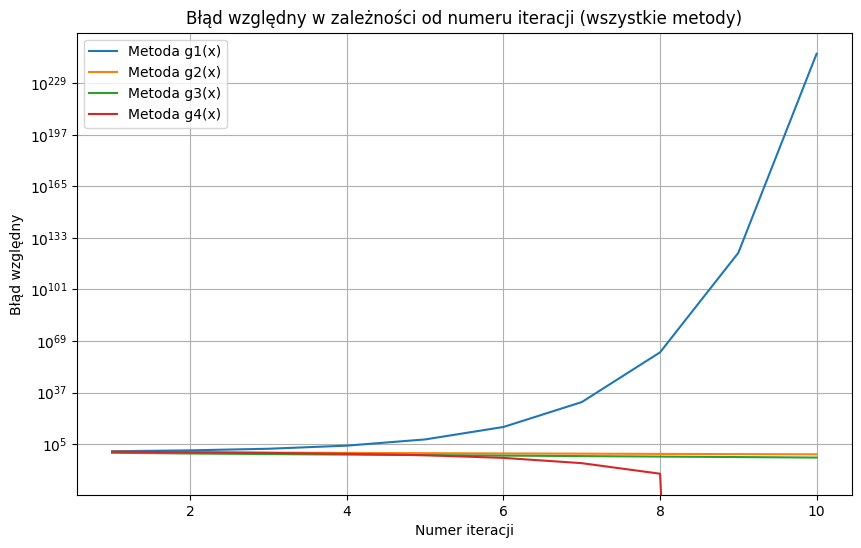

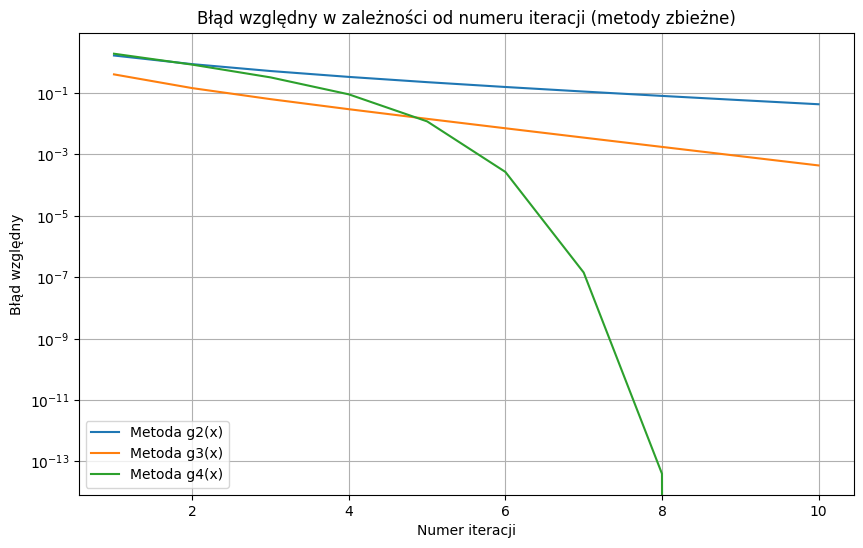

In [27]:
iterations = 10
exact_solution = 2

# Przeprowadzenie iteracji dla każdej funkcji g_i(x)
errors_g1 = iterate(g1, 5, iterations)
errors_g2 = iterate(g2, 10, iterations)
errors_g3 = iterate(g3, 10, iterations)
errors_g4 = iterate(g4, 10, iterations)

# Wykres dla wszystkich metod
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), errors_g1, label='Metoda g1(x)')
plt.plot(range(1, iterations + 1), errors_g2, label='Metoda g2(x)')
plt.plot(range(1, iterations + 1), errors_g3, label='Metoda g3(x)')
plt.plot(range(1, iterations + 1), errors_g4, label='Metoda g4(x)')
plt.yscale('log')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.title('Błąd względny w zależności od numeru iteracji (wszystkie metody)')
plt.legend()
plt.grid(True)
plt.show()

# Wykres dla metod zbieżnych
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), errors_g2, label='Metoda g2(x)')
plt.plot(range(1, iterations + 1), errors_g3, label='Metoda g3(x)')
plt.plot(range(1, iterations + 1), errors_g4, label='Metoda g4(x)')
plt.yscale('log')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.title('Błąd względny w zależności od numeru iteracji (metody zbieżne)')
plt.legend()
plt.grid(True)
plt.show()

Zadanie 3

In [28]:
def funkcja_a(x):
    return x**3 - 2*x - 5

def pochodna_funkcji_a(x):
    return 3*x**2 - 2

def metoda_newtona_a(poczatkowe_przyblizenie, tolerancja, maksymalna_liczba_iteracji):
    x0 = poczatkowe_przyblizenie
    iteracja = 0
    
    while iteracja < maksymalna_liczba_iteracji:
        x1 = x0 - funkcja_a(x0) / pochodna_funkcji_a(x0)
        if abs(x1 - x0) < tolerancja:
            return x1
        x0 = x1
        iteracja += 1
    
    return "Nie udało się znaleźć rozwiązania w określonej liczbie iteracji."

# Przykładowe użycie
poczatkowe_przyblizenie = 1.0
tolerancja = 1e-6
maksymalna_liczba_iteracji = 100

wynik_a = metoda_newtona_a(poczatkowe_przyblizenie, tolerancja, maksymalna_liczba_iteracji)
print("Rozwiązanie dla równania (a):", wynik_a)


Rozwiązanie dla równania (a): 2.0945514815423265


In [29]:
def funkcja_b(x):
    return math.exp(-x) - x

def pochodna_funkcji_b(x):
    return -math.exp(-x) - 1

def metoda_newtona_b(poczatkowe_przyblizenie, tolerancja, maksymalna_liczba_iteracji):
    x0 = poczatkowe_przyblizenie
    iteracja = 0
    
    while iteracja < maksymalna_liczba_iteracji:
        x1 = x0 - funkcja_b(x0) / pochodna_funkcji_b(x0)
        if abs(x1 - x0) < tolerancja:
            return x1
        x0 = x1
        iteracja += 1
    
    return "Nie udało się znaleźć rozwiązania w określonej liczbie iteracji."

# Przykładowe użycie
poczatkowe_przyblizenie = 1.0
tolerancja = 1e-6
maksymalna_liczba_iteracji = 100

wynik_b = metoda_newtona_b(poczatkowe_przyblizenie, tolerancja, maksymalna_liczba_iteracji)
print("Rozwiązanie dla równania (b):", wynik_b)


Rozwiązanie dla równania (b): 0.5671432904097838


In [30]:
def funkcja_c(x):
    return x * math.sin(x) - 1

def pochodna_funkcji_c(x):
    return math.sin(x) + x * math.cos(x)

def metoda_newtona_c(poczatkowe_przyblizenie, tolerancja, maksymalna_liczba_iteracji):
    x0 = poczatkowe_przyblizenie
    iteracja = 0
    
    while iteracja < maksymalna_liczba_iteracji:
        x1 = x0 - funkcja_c(x0) / pochodna_funkcji_c(x0)
        if abs(x1 - x0) < tolerancja:
            return x1
        x0 = x1
        iteracja += 1
    
    return "Nie udało się znaleźć rozwiązania w określonej liczbie iteracji."

# Przykładowe użycie
poczatkowe_przyblizenie = 1.0
tolerancja = 1e-6
maksymalna_liczba_iteracji = 100

wynik_c = metoda_newtona_c(poczatkowe_przyblizenie, tolerancja, maksymalna_liczba_iteracji)
print("Rozwiązanie dla równania (c):", wynik_c)


Rozwiązanie dla równania (c): 1.11415714087193


In [31]:
def liczba_iteracji_dokladnosc(dokladnosc_bitowa, dokladnosc_dziesietna_cel):
    dokladnosc_dziesietna = -math.log10(dokladnosc_bitowa)
    bled_bezwzgledny_cel = 1 / 2**(dokladnosc_dziesietna_cel + 1)
    
    iteracje = math.ceil(math.log2(1 / bled_bezwzgledny_cel) / 2)
    
    return iteracje


print("Liczba iteracji dla 24-bitowej dokładności dla równania (a):", liczba_iteracji_dokladnosc(2**-24, 24))
print("Liczba iteracji dla 53-bitowej dokładności dla równania (a):", liczba_iteracji_dokladnosc(2**-53, 53))


Liczba iteracji dla 24-bitowej dokładności dla równania (a): 13
Liczba iteracji dla 53-bitowej dokładności dla równania (a): 27


Zadanie 4

In [32]:
def f(x):
    return np.array([x[0]**2 + x[1]**2 - 1, x[0]**2 - x[1]])

In [33]:
def j(x):
    return np.array([[2*x[0], 2*x[1]], [2*x[0], -1]])

In [34]:
def newton_method(F, J, x0, tol=1e-2, max_iter=100):
    x = x0
    for i in range(max_iter):
        delta_x = np.linalg.solve(J(x), -F(x))
        x = x + delta_x
        if np.linalg.norm(delta_x) < tol:
            break
    return x

In [35]:
a = np.sqrt(5)/2
b = np.sqrt(5)/2

exact_solution = np.array([np.sqrt(np.abs(a - 1/2)), np.abs(b - 1/2)])

initial_guess = np.array([0.5, 0.5])
solution_newton = newton_method(f, j, initial_guess)

relative_error = np.linalg.norm(solution_newton - exact_solution) / np.linalg.norm(exact_solution)

print("Dokładne rozwiązanie:", exact_solution)
print("Rozwiązanie metodą Newtona:", solution_newton)
print("Błąd względny:", relative_error)

Dokładne rozwiązanie: [0.78615138 0.61803399]
Rozwiązanie metodą Newtona: [0.78616432 0.61803399]
Błąd względny: 1.2938177160533094e-05


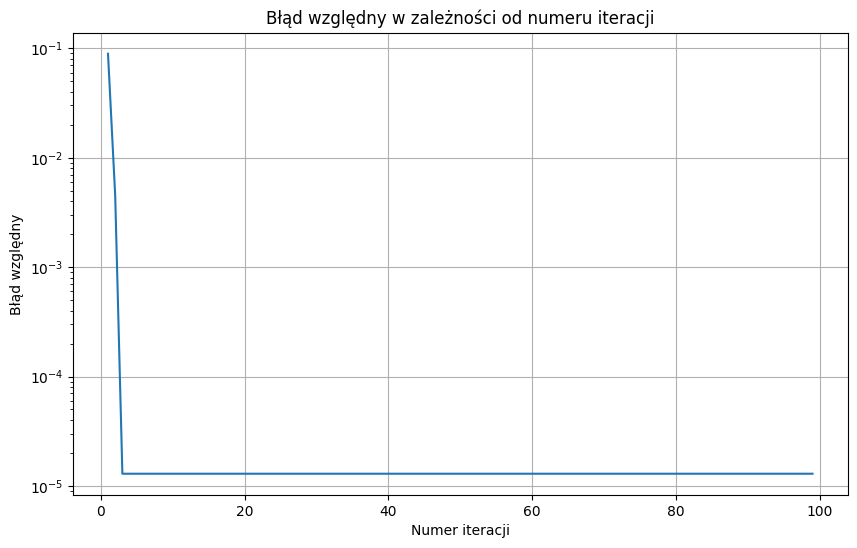

In [36]:
fe = []
for i in range(1, 100):
    fe.append(np.linalg.norm(newton_method(f, j, initial_guess, 1e-2, i) - exact_solution) / np.linalg.norm(exact_solution))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), fe)
plt.yscale('log')
plt.xlabel('Numer iteracji')
plt.ylabel('Błąd względny')
plt.title('Błąd względny w zależności od numeru iteracji')
plt.grid(True)
plt.show()